TUGAS BESAR IF2220 PROBABILITAS DAN STATISTIKA

PENARIKAN KESIMPULAN DAN PENGUJIAN HIPOTESIS


KEVIN RONI 13520114

YOSEPH ALEXANDER SIREGAR 13520141

In [1]:
#IMPORT MODULE & LOAD CSV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as scst
import math

df = pd.read_csv('water_potability.csv', header=None)
df.columns = ["iD", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potabilty"]
df

,iD,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potabilty
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


#### 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [3]:
df1 = df.drop(columns=["iD", "Potabilty"])
stats = pd.DataFrame()
stats["Mean"] = df1.mean()
stats["Median"] = df1.median()
stats["Standard Deviation"] = df1.std()
stats["Variance"] = df1.var()
stats["Range"] = df1.max() - df1.min()
stats["Min"] = df1.min()
stats["Max"] = df1.max()
stats["Q1"] = df1.quantile(0.25)
stats["Q3"] = df1.quantile(0.75)
stats["IQR"] = stats["Q3"] - stats["Q1"]
stats["Skewness"] = df1.skew()
stats["Kurtosis"] = df1.kurt()
stats

,Mean,Median,Standard Deviation,Variance,Range,Min,Max,Q1,Q3,IQR,Skewness,Kurtosis
pH,7.087193,7.029490,1.572803,2.473709e+00,13.772501,0.227499,14.000000,6.090785,8.053006,1.962221,0.048535,0.626904
Hardness,195.969209,197.203525,32.643166,1.065576e+03,243.845890,73.492234,317.338124,176.740657,216.447589,39.706932,-0.085321,0.525480
Solids,21904.673439,20926.882155,8625.397911,7.439749e+07,56167.729801,320.942611,56488.672413,15614.412962,27170.534649,11556.121687,0.591011,0.337320
Chloramines,7.134322,7.142014,1.585214,2.512904e+00,11.736129,1.390871,13.127000,6.138326,8.109933,1.971607,0.013003,0.549782
Sulfate,333.211376,332.214113,41.211111,1.698356e+03,352.030642,129.000000,481.030642,307.626986,359.268147,51.641161,-0.045728,0.786854
Conductivity,426.476708,423.438372,80.701872,6.512792e+03,551.722883,201.619737,753.342620,366.619219,482.209772,115.590553,0.268012,-0.237206
OrganicCarbon,14.357940,14.323286,3.325770,1.106075e+01,24.806707,2.200000,27.006707,12.122530,16.683562,4.561031,-0.020220,0.031018
Trihalomethanes,66.400717,66.482041,16.081109,2.586021e+02,115.422987,8.577013,124.000000,55.949993,77.294613,21.344620,-0.051383,0.223017
Turbidity,3.969497,3.967374,0.780471,6.091350e-01,5.044749,1.450000,6.494749,3.442882,4.514663,1.071781,-0.032266,-0.049831


### 2. Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

a. Kolom PH

In [ ]:
sns.histplot(data = df["pH"])
plt.show()

In [ ]:
df["pH"].plot(kind="box")
plt.show()

b. Kolom Hardness

In [ ]:
sns.histplot(data = df["Hardness"])
plt.show()

In [ ]:
df["Hardness"].plot(kind="box")
plt.show()

c. Kolom Solids

In [ ]:
sns.histplot(data = df["Solids"])

In [ ]:
df["Solids"].plot(kind="box")

d. Kolom Chloramines

In [ ]:
sns.histplot(data = df["Chloramines"])

In [ ]:
df["Chloramines"].plot(kind="box")

e. Kolom Sulfate

In [ ]:
sns.histplot(data = df["Sulfate"])

In [ ]:
df["Sulfate"].plot(kind="box")

f. Kolom Conductivity

In [ ]:
sns.histplot(data = df["Conductivity"])

In [ ]:
df["Conductivity"].plot(kind="box")

g. Kolom OrganicCarbon

In [ ]:
sns.histplot(data = df["OrganicCarbon"])

In [ ]:
df["OrganicCarbon"].plot(kind="box")

h. Kolom Trihalomethanes

In [ ]:
sns.histplot(data = df["Trihalomethanes"])

In [ ]:
df["Trihalomethanes"].plot(kind="box")

i. Kolom Turbidity

In [ ]:
sns.histplot(data = df["Turbidity"])
plt.show()

In [ ]:
df["Turbidity"].plot(kind="box")
plt.show()

#### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

In [ ]:
def normality_test(data):
    stat, p_value = stats.shapiro(data)
    print("Shapiro-Wilk Test:")
    print("Statistics=%.3f, p=%.3f" % (stat, p_value))

normality_test(df["pH"])

4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

Akan dilakukan 6 langkah testing, yaitu sebagai berikut:
1. Tentukan Hipotesis nol (H0
: θ = θ0
), dimana θ bisa berupa μ, σ
2
, p, atau data lain berdistribusi

tertentu (normal, binomial, dsc.).

2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0
, θ < θ0
, atau θ ≠ θ0
.

3. Tentukan tingkat signifikan α.

4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis. Titik kritis didapat berdasarkan $z_{\alpha}$ atau $z_\frac{\alpha}{2}$. Tergantung pada hipotesis yang dipilih, titik kritis akan berbeda.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang
digunakan.
6. Ambil keputusan dengan TOLAK H0
jika nilai uji terletak di daerah kritis atau dengan tes
signifikan, TOLAK H0
jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.

In [45]:
def uji_statistik(data, H0, opt, alpha, Z):
    result = scst.ttest_1samp(data, H0, alternative=opt)
    print("Tes statistik         :", result.statistic)
    print("p-value               :", result.pvalue)
    if (result.statistic > Z):
        print("H0 ditolak karena terletak di daerah kritis")
    else:
        print("H0 diterima karena terletak di luar daerah kritis")
    if (result.pvalue < alpha):
        print("H0 ditolak karena p-value lebih kecil dari tingkat signifikasi yang diinginkan", alpha)
    else:
        print("H0 diterima karena p-value lebih besar dari tingkat signifikasi yang diinginkan", alpha)

def uji_statistik_2(data, H0, opt, alpha, Z):
    result = scst.ttest_1samp(data, H0, alternative=opt)
    print("Tes statistik         :", result.statistic)
    print("p-value               :", result.pvalue)
    if (result.statistic > Z or result.statistic < -1*Z):
        print("H0 ditolak karena terletak di daerah kritis")
    else:
        print("H0 diterima karena terletak di luar daerah kritis")
    if (result.pvalue < alpha):
        print("H0 ditolak karena p-value lebih kecil dari tingkat signifikasi yang diinginkan", alpha)
    else:
        print("H0 diterima karena p-value lebih besar dari tingkat signifikasi yang diinginkan", alpha)

def uji_statistik_proporsi(p,p0,n,Z):
    result = (p-p0)/math.sqrt(p0*(1-p0)/n)
    print("Tes statistik         :", result)
    print("p-value               :", 2*count_pValue(result))
    if (result > Z or result < -1*Z):
        print("H0 ditolak karena terletak di daerah kritis")
    else:
        print("H0 diterima karena terletak di luar daerah kritis")

def uji_statistik_proporsi2(p,p0,n,Z):
    result = (p-p0)/math.sqrt(p0*(1-p0)/n)
    print("Tes statistik         :", result)
    print("p-value               :", count_pValue(result))
    if (result < -1*Z):
        print("H0 ditolak karena terletak di daerah kritis")
    else:
        print("H0 diterima karena terletak di luar daerah kritis")

def count_pValue(Z):
    return (1 - scst.norm.cdf(abs(Z)))


a. Nilai Rata-rata pH di atas 7?

H0                    : μ = 7
H1                    : μ > 7
Tingkat signifikasi(α): 0.05
Daerah kritis         : Z > 1.645
Tes statistik         : 2.485445147379887
p-value               : 0.006509872359240925
H0 ditolak karena terletak di daerah kritis
H0 ditolak karena p-value lebih kecil dari tingkat signifikasi yang diinginkan 0.05


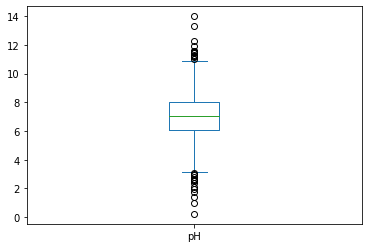

In [54]:
print("H0                    : μ = 7")
print("H1                    : μ > 7")
alpha = 0.05
print("Tingkat signifikasi(α):", alpha)
Z = 1.645
print("Daerah kritis         : Z >", Z)
uji_statistik(df["pH"], 7, "greater", alpha, Z)
df["pH"].plot(kind="box")
plt.show()

Kesimpulannya, H0 akan ditolak dan menerima H1. Maka dapat dikatakan nilai rata-rata pH di atas 7.

b. Nilai Rata-rata Hardness tidak sama dengan 205?

H0                    : μ = 205
H1                    : μ != 205
Tingkat signifikasi(α): 0.05
Daerah kritis         : Z > 1.96 or Z < -1.96
Tes statistik         : -12.403137170010732
p-value               : 4.299181043195823e-34
H0 ditolak karena terletak di daerah kritis
H0 ditolak karena p-value lebih kecil dari tingkat signifikasi yang diinginkan 0.05


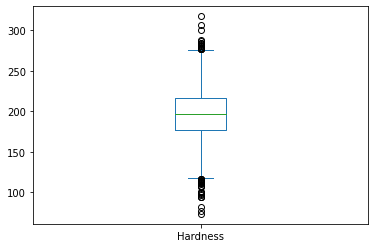

In [55]:
print("H0                    : μ = 205")
print("H1                    : μ != 205")
alpha = 0.05
print("Tingkat signifikasi(α):", alpha)
Z = 1.96
print("Daerah kritis         : Z > " +str(Z)+ " or Z < -" +str(Z))
uji_statistik_2(df["Hardness"], 205, "two-sided", alpha, Z)
df["Hardness"].plot(kind="box")
plt.show()

Kesimpulannya H0 akan ditolak dan menerima H1. Maka dapat dikatakan nilai rata-rata Hardness tidak sama dengan 205.

c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

H0                    : μ = 21900
H1                    : μ != 21900
Tingkat signifikasi(α): 0.05
Daerah kritis         : Z > 1.96 or Z < -1.96
Tes statistik         : 0.5636797715721551
p-value               : 0.5742467134052605
H0 diterima karena terletak di luar daerah kritis
H0 diterima karena p-value lebih besar dari tingkat signifikasi yang diinginkan 0.05


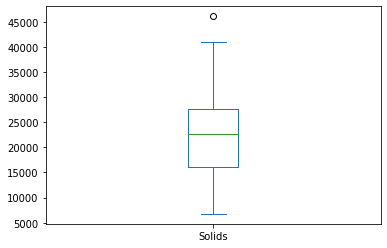

In [57]:
print("H0                    : μ = 21900")
print("H1                    : μ != 21900")
alpha = 0.05
print("Tingkat signifikasi(α):", alpha)
Z = 1.96
print("Daerah kritis         : Z > " +str(Z)+ " or Z < -" +str(Z))
df_100 = df.head(100)
uji_statistik_2(df_100["Solids"], 21900, "two-sided", alpha, Z)
df_100["Solids"].plot(kind="box")
plt.show()

Kesimpulannya H0 akan diterima. Maka tidak dapat dikatakan bahwa nilai rata-rata 100 baris pertama kolom Solids bukan 21900.

d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan
10%?

H0                    : P0 = 0.1
H1                    : P1 != 0.1
Tingkat signifikasi(α): 0.05
Daerah kritis         : Z > 1.96 or Z < -1.96
Tes statistik         : 40.44637613158932
p-value               : 0.0
H0 ditolak karena terletak di daerah kritis


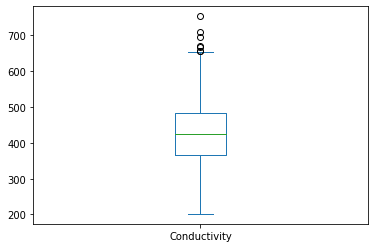

In [58]:
sample = []
for row in df["Conductivity"]:
    if (row > 450):
        sample.append(row)

print("H0                    : P0 = 0.1")
print("H1                    : P1 != 0.1")
alpha = 0.05
print("Tingkat signifikasi(α):", alpha)
Z = 1.96
print("Daerah kritis         : Z > " +str(Z)+ " or Z < -" +str(Z))
uji_statistik_proporsi(len(sample)/len(df), 0.1, len(df), Z)
df["Conductivity"].plot(kind="box")
plt.show()

Kesimpulannya H0 akan ditolak dan menerima H1. Maka dapat dikatakan proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%.

e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

106
H0                    : P0 = 0.05
H1                    : P1 < 0.05
Tingkat signifikasi(α): 0.05
Daerah kritis         : Z < -1.96
Tes statistik         : 0.5628826416670951
p-value               : 0.2867574004907629
H0 diterima karena terletak di luar daerah kritis


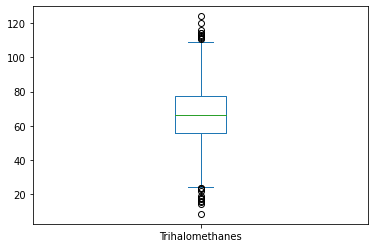

In [59]:
sample2 = []
for row in df["Trihalomethanes"]:
    if (row < 40):
        sample2.append(row)
print(len(sample2))
print("H0                    : P0 = 0.05")
print("H1                    : P1 < 0.05")
alpha = 0.05
print("Tingkat signifikasi(α):", alpha)
Z = 1.96
print("Daerah kritis         : Z < -" +str(Z))  
uji_statistik_proporsi2(len(sample2)/len(df), 0.05, len(df), Z)
df["Trihalomethanes"].plot(kind="box")
plt.show()

Kesimpulannya H0 akan diterima. Maka tidak dapat dikatakan nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%